In [101]:
from urllib.request import urlretrieve
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Question B 2: Analysis of CFC-11 Data
This following analysis is to check the median value of CFC-11 in the atmosphere and get the median accuracy (repeatability)

# Barbados GC-MD

In [102]:
b_gcmd_url = 'https://agage.eas.gatech.edu/data_archive/agage/gc-md/event/barbados/ascii/AGAGE-GCMD_RPB_cfc-11.txt'
gcmd_file = "data/barbados_gc-md.txt"
if not os.path.isfile(gcmd_file):
    urlretrieve(b_gcmd_url, gcmd_file)


In [103]:
cols = ['time', 'DD', 'MM', 'YYYY', 'hh', 'mm', 'mole_fraction', 'repeability', 'flag']
data = pd.read_csv(gcmd_file, delim_whitespace=True, skiprows=18, index_col=False)
data.columns = cols
#data.head()


/tmp/ipykernel_2341/2574215811.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gcmd_file, delim_whitespace=True, skiprows=18, index_col=False)


In [104]:
mask_2017 = data["YYYY"] == 2017
barb_2017 = data[mask_2017].dropna()
gcmd_mf_mean = statistics.mean(barb_2017["mole_fraction"])
gcmd_mf_median = statistics.median(barb_2017["mole_fraction"])
gcmd_std_mf_mean = statistics.mean(barb_2017["repeability"])
gcmd_std_mf_median = statistics.median(barb_2017["repeability"])


GC-MD Barbados Data in ppt
Mean is: 229.34191824962704
Median is: 229.265
Mean of repeability is: 0.16481829935355544
Median of repeability is: 0.16


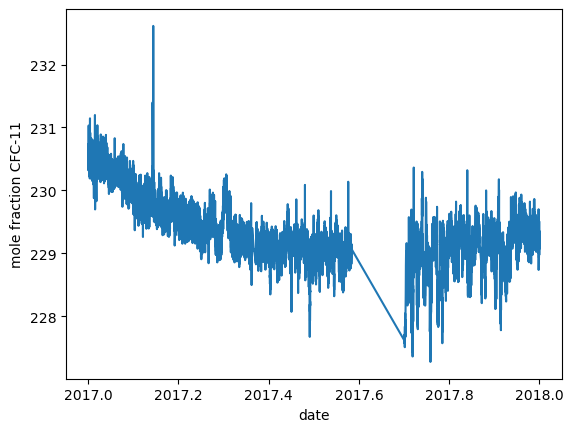

In [105]:
plt.plot(barb_2017["time"], barb_2017["mole_fraction"])
plt.ylabel("mole fraction CFC-11")
plt.xlabel("date")
print("GC-MD Barbados Data in ppt")
print("Mean is: "+str(gcmd_mf_mean))
print("Median is: "+str(gcmd_mf_median))
print("Mean of repeability is: "+str(gcmd_std_mf_mean))
print("Median of repeability is: "+str(gcmd_std_mf_median))

# Zepellin GC-Medusa

In [106]:
z_gcmdedusa_url = "https://agage.eas.gatech.edu/data_archive/agage/gc-ms-medusa/event/zeppelin/ascii/AGAGE-GCMS-Medusa_ZEP_cfc-11.txt"
gcmedusa_file = "data/zeppelin_gc-medusa.txt"
if not os.path.isfile(gcmedusa_file):
    urlretrieve(z_gcmdedusa_url, gcmedusa_file)

In [107]:
data = pd.read_csv(gcmedusa_file, delim_whitespace=True, skiprows=24, index_col=False)
data.columns = cols
# data.head()

/tmp/ipykernel_2341/2995159930.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gcmedusa_file, delim_whitespace=True, skiprows=24, index_col=False)


In [108]:
mask_2017 = data["YYYY"] == 2017
zepp_2017 = data[mask_2017].dropna()
gcmedusa_mf_mean = statistics.mean(zepp_2017["mole_fraction"])
gcmedusa_mf_median = statistics.median(zepp_2017["mole_fraction"])
gcmedusa_std_mf_mean = statistics.mean(zepp_2017["repeability"])
gcmedusa_std_mf_median = statistics.median(zepp_2017["repeability"])

GC-Medusa Zeppelin Data in ppt
Mean is: 230.11845522062035
Median is: 230.054
Mean of repeability is: 0.22522018348623854
Median of repeability is: 0.219


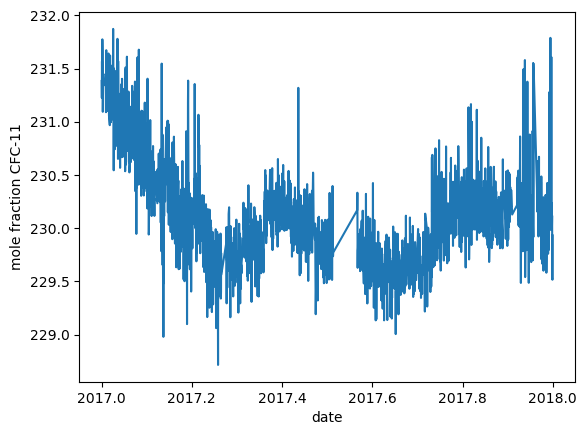

In [109]:
plt.plot(zepp_2017["time"], zepp_2017["mole_fraction"])
plt.ylabel("mole fraction CFC-11")
plt.xlabel("date")
print("GC-Medusa Zeppelin Data in ppt")
print("Mean is: "+str(gcmedusa_mf_mean))
print("Median is: "+str(gcmedusa_mf_median))
print("Mean of repeability is: "+str(gcmedusa_std_mf_mean))
print("Median of repeability is: "+str(gcmedusa_std_mf_median))

# Question B3 Statistics

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_dual_gaussian(mean1, std_deviation1, confidence1, mean2, std_deviation2, confidence2, x_label='X-axis', y_label='Y-axis'):
    x = np.linspace(min(mean1, mean2) - 4 * max(std_deviation1, std_deviation2),
                    max(mean1, mean2) + 4 * max(std_deviation1, std_deviation2), 1000)
    
    y1 = (1 / (std_deviation1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean1) / std_deviation1)**2)
    y2 = (1 / (std_deviation2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean2) / std_deviation2)**2)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y1, label=f'Mean = {mean1}, Std Dev = {std_deviation1}')
    plt.plot(x, y2, label=f'Mean = {mean2}, Std Dev = {std_deviation2}')
    
    # Confidence intervals for first Gaussian
    conf_interval1 = norm.interval(confidence1, loc=mean1, scale=std_deviation1)
    x_fill1 = np.linspace(conf_interval1[0], conf_interval1[1], 1000)
    y_fill1 = (1 / (std_deviation1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill1 - mean1) / std_deviation1)**2)
    plt.fill_between(x_fill1, y_fill1, color='grey', alpha=0.5, label=f'{int(confidence1*100)}% Confidence Interval for Mean1')

    # Confidence intervals for second Gaussian
    conf_interval2 = norm.interval(confidence2, loc=mean2, scale=std_deviation2)
    x_fill2 = np.linspace(conf_interval2[0], conf_interval2[1], 1000)
    y_fill2 = (1 / (std_deviation2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill2 - mean2) / std_deviation2)**2)
    plt.fill_between(x_fill2, y_fill2, color='blue', alpha=0.3, label=f'{int(confidence2*100)}% Confidence Interval for Mean2')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Dual Gaussian Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Mean1: {mean1:.5g}, {int(confidence1*100)}% Confidence Interval: [{conf_interval1[0]:.5g}, {conf_interval1[1]:.5g}]")
    print(f"Mean2: {mean2:.5g}, {int(confidence2*100)}% Confidence Interval: [{conf_interval2[0]:.5g}, {conf_interval2[1]:.5g}]")


# GC-MD

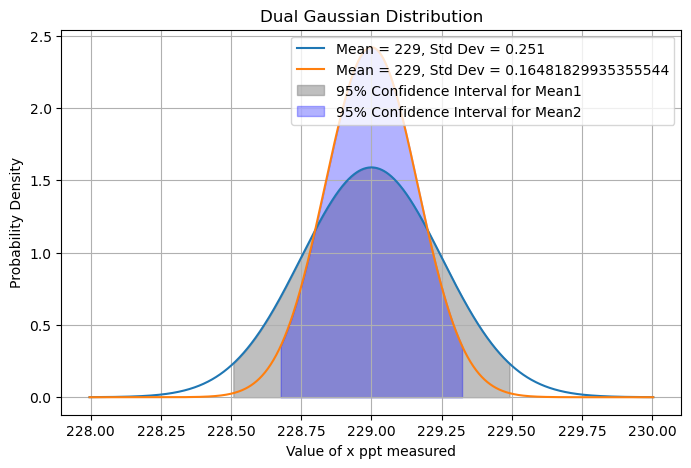

Mean1: 229, 95% Confidence Interval: [228.51, 229.49]
Mean2: 229, 95% Confidence Interval: [228.68, 229.32]


In [111]:

plot_dual_gaussian(mean1=229, std_deviation1=0.251, confidence1=0.95, mean2=229, std_deviation2=gcmd_std_mf_mean, confidence2=0.95, x_label='Value of x ppt measured', y_label='Probability Density')


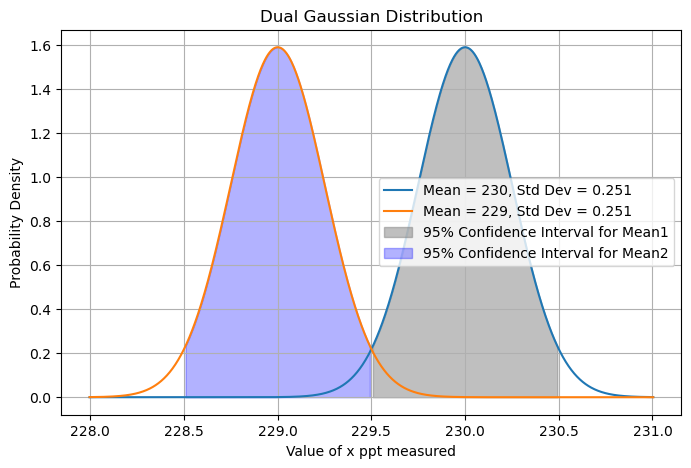

Mean1: 230, 95% Confidence Interval: [229.51, 230.49]
Mean2: 229, 95% Confidence Interval: [228.51, 229.49]


In [112]:

plot_dual_gaussian(mean1=230, std_deviation1=0.251, confidence1=0.95, mean2=229, std_deviation2=0.251, confidence2=0.95, x_label='Value of x ppt measured', y_label='Probability Density')


Assuming: $\sigma \approx \text{repeatability}$

Assuming that the std. deviation correlates linearly with the Volume (very big assumption but i don't know how else we can relate the volume to std. deviation)

$\sigma_1 \cdot V_1 \approx \sigma_2 \cdot V_2$

$V_2 \approx \frac{\sigma_1}{\sigma_2} \cdot V1$

In [113]:
V1 = 2 # L
sigma1 = 0.16 # ppt
sigma2 = 0.251
V2 = sigma1/sigma2 * V1
display(V2)

1.2749003984063745

# Question B4: MS assignment

In [114]:
import re

def molecular_mass(formula):
    # Atomic masses retrieved from NIST / PubChem (for example purposes only)
    atomic_masses = {
        'H': 1.00784,
        'C': 12.0000,
        'O': 15.999,
        'N': 14.0067,
        'F': 18.99840,
        'Cl': 34.96885,
        # Add other elements as needed
    }

    # Regular expression to find elements and optional following numbers
    token_pattern = re.compile(r'([A-Z][a-z]*)(\d*)')
    tokens = token_pattern.findall(formula)

    total_mass = 0

    for (element, count) in tokens:
        if count == '':
            count = 1  # If no number follows an element, there's one of that element
        count = int(count)

        # Get the atomic mass for the element and multiply by the count
        if element in atomic_masses:
            total_mass += atomic_masses[element] * count
        else:
            raise ValueError(f"Atomic mass for element '{element}' not found.")

    return formula, round(total_mass)

In [115]:
Formula = ["CCl2F2", "CCl3F", "CCl2FCClF2", "CH3CCl3", "CCl4", "CCl3", "CCl2", "CCl2F", "CClF2", "CF2CFCl2", "CFCl", "CF", "CCl", "F2", "CH3CCl2", "C2H2Cl", "CF2"]
Mass = []
for mass in Formula:
    Mass.append((molecular_mass(mass)[1]))
df = pd.DataFrame(Mass, index=Formula, columns=["Mass"])
print(df)


            Mass
CCl2F2       120
CCl3F        136
CCl2FCClF2   186
CH3CCl3      132
CCl4         152
CCl3         117
CCl2          82
CCl2F        101
CClF2         85
CF2CFCl2     151
CFCl          66
CF            31
CCl           47
F2            38
CH3CCl2       97
C2H2Cl        61
CF2           50


# Question B5/6

ENVISAT measures wih IR.

Zhou, M., Vigouroux, C., Langerock, B., Wang, P., Dutton, G., Hermans, C., Kumps, N., Metzger, J.-M., Toon, G., and De Mazière, M.: CFC-11, CFC-12 and HCFC-22 ground-based remote sensing FTIR measurements at Réunion Island and comparisons with MIPAS/ENVISAT data, Atmos. Meas. Tech., 9, 5621–5636, https://doi.org/10.5194/amt-9-5621-2016, 2016

